In [1]:
import os
from scipy.io import wavfile
import librosa
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(111)

This is my quick implementation of SpecAugment paper [here](https://arxiv.org/abs/1904.08779), without time warping. It works regardless of PyTorch or Tensorflow.

You set percentage of frames to mask so should work with long and short segments.

Let's test it:

In [2]:
def spec_augment(spec: np.ndarray, num_mask=2, 
                 freq_masking_max_percentage=0.15, time_masking_max_percentage=0.3):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num = spec.shape
        freq_percentage = random.uniform(0.0, freq_masking_max_percentage)
        
        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0

        time_percentage = random.uniform(0.0, time_masking_max_percentage)
        
        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0
    
    return spec
    

In [3]:
audio_path = os.path.join("../input/train_curated/d7d25898.wav")
sr, audio = wavfile.read(audio_path)

x = librosa.feature.melspectrogram(y=audio.astype(float), sr=sr, S=None, n_fft=512, hop_length=256, n_mels=40).T
x = librosa.power_to_db(x, ref=np.max)

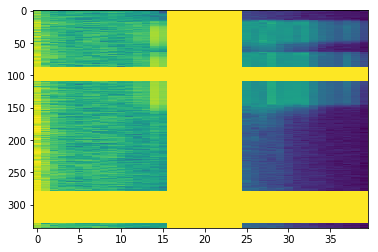

In [4]:
plt.figure()
plt.imshow(spec_augment(x),aspect= 'auto')
plt.show()

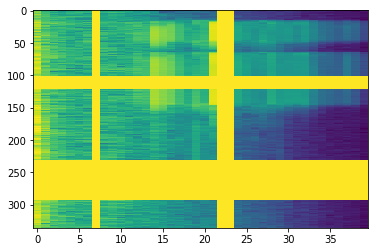

In [5]:
plt.figure()
plt.imshow(spec_augment(x),aspect= 'auto')
plt.show()

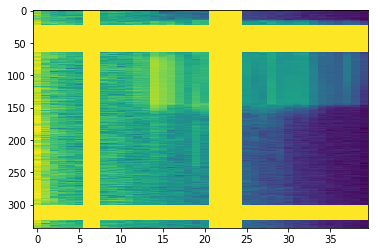

In [6]:
plt.figure()
plt.imshow(spec_augment(x),aspect= 'auto')
plt.show()